In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mapply
mapply.init(n_workers=-1)

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.shape

(7613, 5)

In [4]:
test_df.shape

(3263, 4)

In [5]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [6]:
test_df.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


### Counting NaN values

In [7]:
train_df[["keyword", "location"]].isnull().sum()

keyword       61
location    2533
dtype: int64

In [8]:
test_df[["keyword", "location"]].isnull().sum()

keyword       26
location    1105
dtype: int64

### Number of disaster tweets

<AxesSubplot:xlabel='target'>

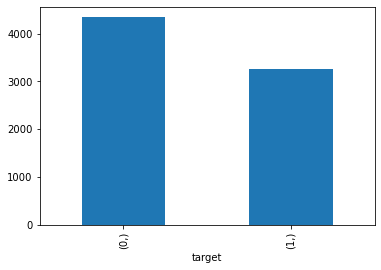

In [9]:
train_df[["target"]].value_counts().plot(kind = "bar")

### Disaster tweets by location

In [10]:
train_df[train_df['target'] == 1].groupby("location").count().\
sort_values("id", ascending = False)

,id,keyword,text,target
location,,,,
USA,67,67,67,67
United States,27,27,27,27
Nigeria,22,22,22,22
India,20,20,20,20
Mumbai,19,19,19,19
...,...,...,...,...
Himalayan Mountains,1,1,1,1
Hertfordshire,1,1,1,1
"Here, unless there.",1,1,1,1


### Disaster tweets by keyword 

In [11]:
train_df[train_df['target'] == 1].groupby("keyword").count().\
sort_values("id", ascending = False)

,id,location,text,target
keyword,,,,
derailment,39,25,39,39
wreckage,39,28,39,39
outbreak,39,30,39,39
debris,37,22,37,37
oil%20spill,37,27,37,37
...,...,...,...,...
blazing,1,1,1,1
epicentre,1,1,1,1
body%20bag,1,1,1,1


### Cleaning up the data 

In [12]:
import re
import string
import emoji

def clean_up_text(text):
    
    text = re.sub(r'%[0-9]+','', text)
    text = re.sub(r'amp|new|via','', text)
    text = re.sub(r'@[A-Za-z0-9_]+','', text)
    text = re.sub(r'#','', text)
    text = re.sub(r'RT : ','', text)
    text = re.sub(r'\n','', text)
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','', text)
    text = re.sub(r"https?://\S+|www\.\S+","", text)
    text = re.sub(r"<.*?>","", text)
    text = re.sub(emoji.get_emoji_regexp(), r"", text)
    text = re.sub("[^a-zA-Z0-9]", " ", text)
    text = re.sub(" +"," ", text)
    text = re.sub("\\b[a-zA-Z0-9]{10,100}\\b","",text)    
    text = re.sub("\\b[a-zA-Z0-9]{0,1}\\b","",text)
    text = str.lower(text)
    return text

In [13]:
train_df["text"] = train_df["text"].mapply(clean_up_text)
test_df["text"] = test_df["text"].mapply(clean_up_text)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

### Correct Misspelled words 

In [14]:
from spellchecker import SpellChecker
spell_checker = SpellChecker()

def correct_misspelled_words(text):
    correct_text = []
    for w in text.split(" "):
        if w in spell_checker.unknown(text.split(" ")):
            correct_text.append(spell_checker.correction(w))
        else: correct_text.append(w)
    return " ".join(correct_text)

In [15]:
train_df["text"] = train_df["text"].mapply(correct_misspelled_words)
test_df["text"] = test_df["text"].mapply(correct_misspelled_words)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

### Removing Stop words 

In [16]:
import nltk
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))

def remove_stopwords(text):
    text = [w.lower() for w in text.split() \
            if w.lower() not in stopwords_set]
    return " ".join(text)

In [17]:
train_df["text"] = train_df["text"].mapply(remove_stopwords)
test_df["text"] = test_df["text"].mapply(remove_stopwords)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

In [18]:
train_df[train_df['target'] == 1]["text"]

0                       deeds reason may allah forgive us
1                    forest fire near la range ask canada
2       residents asked shelter place notified officer...
3                  13 000 people receive wildfires orders
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    control wild fires even northern part state tr...
7610                           94 01 04 ut volcano hawaii
7611    police bike collided car little portugal bike ...
7612        latest homes razed northern wildfire abc news
Name: text, Length: 3271, dtype: object

In [19]:
test_df["text"]

0                             happened terrible car crash
1               heard different cities stay safe everyone
2       forest fire spot pond geese fleeing across str...
3                              lighting spokane wildfires
4                  typhoon soudelor kills 28 china taiwan
                              ...                        
3258                  safety los angeles safety fasteners
3259    storm ri worse last hurricane city others hard...
3260                                   green line chicago
3261                 meg issues hazardous weather outlook
3262          activated municipal emergency plan yycstorm
Name: text, Length: 3263, dtype: object

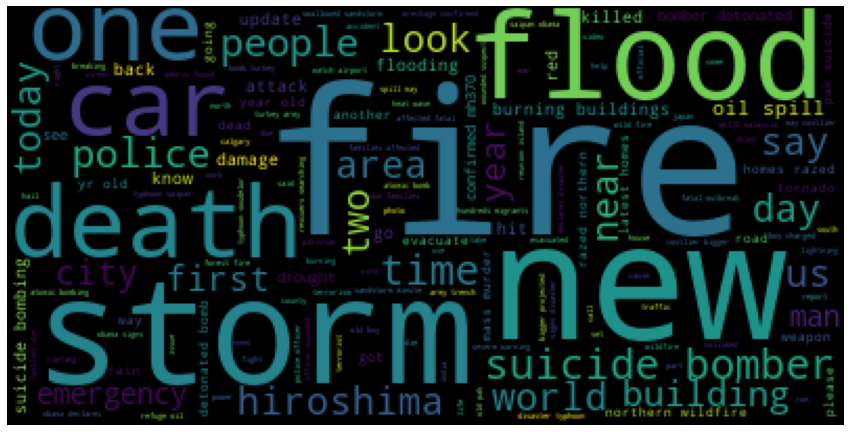

In [20]:
from wordcloud import WordCloud

wordcloud_1 = WordCloud().generate(" ".join(train_df[train_df['target'] == 1]["text"].to_list()))
plt.figure(figsize = (15, 20), facecolor = None) 
plt.imshow(wordcloud_1)
plt.axis("off")
plt.show()

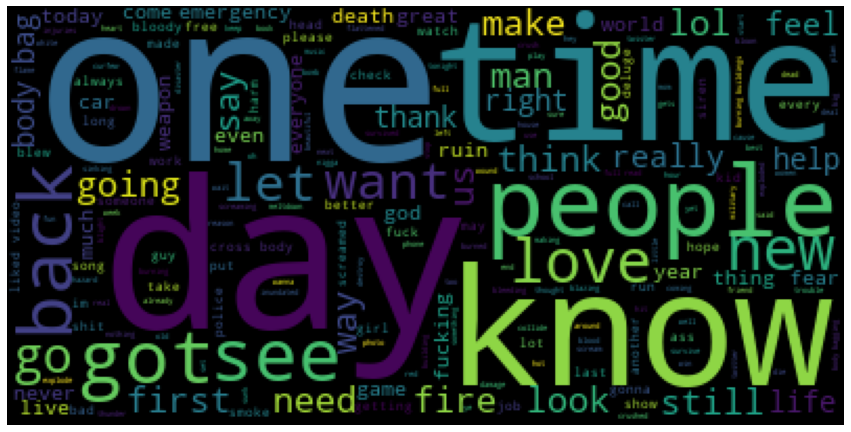

In [21]:
wordcloud_0 = WordCloud().generate(" ".join(train_df[train_df['target'] == 0]["text"].to_list()))
plt.figure(figsize = (15, 20), facecolor = None) 
plt.imshow(wordcloud_0)
plt.axis("off")
plt.show()